<a href="https://colab.research.google.com/github/APIonSteroids/APIonSteroids/blob/main/Comp_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Preparation
data_path = "/content/IMDb Movies India.csv"
movie_data = pd.read_csv(data_path, encoding='latin1')
print(movie_data.columns)

# Dropping rows with missing values
movie_data.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes'], inplace=True)

# Feature Engineering
features = movie_data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
target = movie_data['Votes']

# One-hot encoding
features = pd.get_dummies(features)

# Model Building
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Clean target variables (assuming the cleaning is necessary for this dataset)
y_train = y_train.str.replace(r'[^0-9.]', '', regex=True).astype(float)
y_test = y_test.str.replace(r'[^0-9.]', '', regex=True).astype(float)  # Apply similar cleaning to y_test

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Prediction
new_movie = pd.DataFrame({
    'Genre_Action': [0], 'Genre_Drama': [1],
    'Director_John Doe': [0], 'Actor 1_Actor1': [1],
    'Actor 2_Actor2': [0], 'Actor 3_Actor3': [1]
})
votes_prediction = model.predict(new_movie)
print(f"Predicted Votes for the New Movie: {votes_prediction}")

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [ ]:
import pandas as pd
import chardet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the data
# Detect the encoding of the CSV file and use it directly when reading the file
data_path = "/content/MetacriticPCGamesofAllTime.csv"
with open(data_path, "rb") as f:
    result = chardet.detect(f.read())
    encoding = result["encoding"]

# Load the data using the detected encoding
data = pd.read_csv(data_path, encoding=encoding)

# Drop rows with missing values
data = data.dropna()

# Step 2: Split the data into features (X) and target (y)
X = data['title']
y = data['publisher']

# Step 3: Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a classification model (e.g., Multinomial Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 7: Use the trained model for prediction
new_text = ["Your new text here"]
new_text_features = vectorizer.transform(new_text)
predicted_label = classifier.predict(new_text_features)
print("Predicted label for new text:", predicted_label)

Accuracy: 0.1753846153846154
Predicted label for new text: ['Ubisoft']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataframe
print(df.head())

# Prepare the features and target. Use the numerical features directly instead of applying CountVectorizer.
# Assuming 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' are the features we want to use
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Use double brackets to select multiple columns as DataFrame
y = df['species']

# Encode the target variable (species) to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Model Accuracy: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Import necessary libraries for metrics
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  

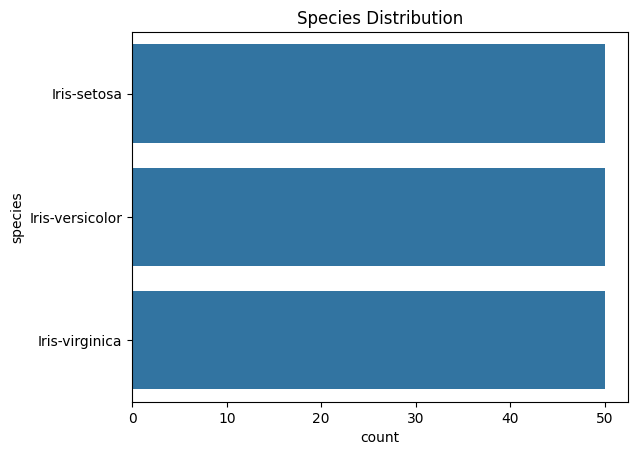

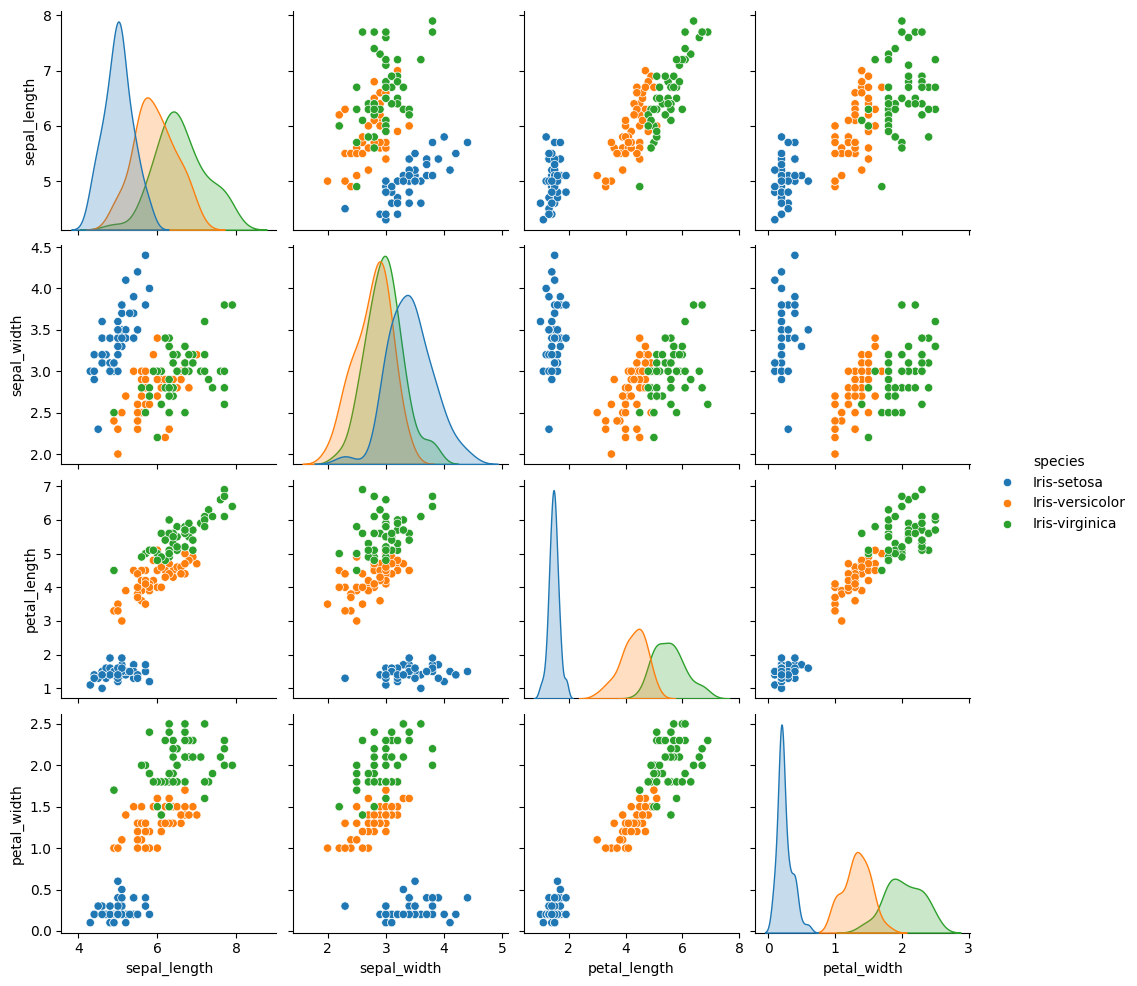

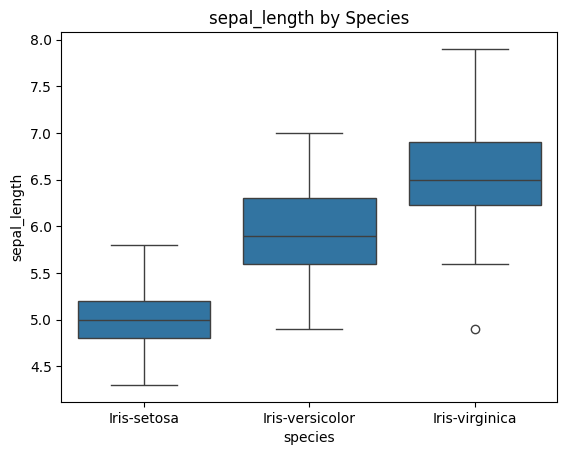

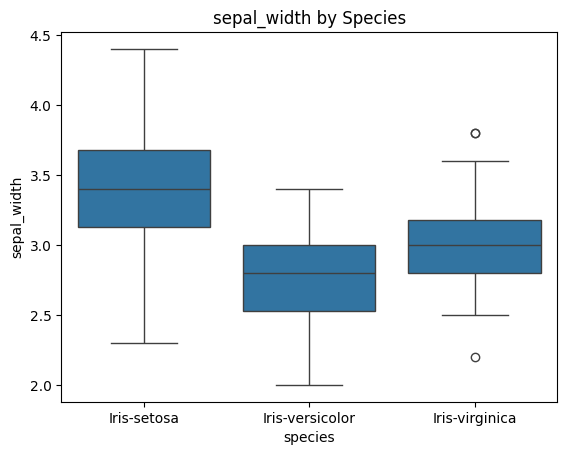

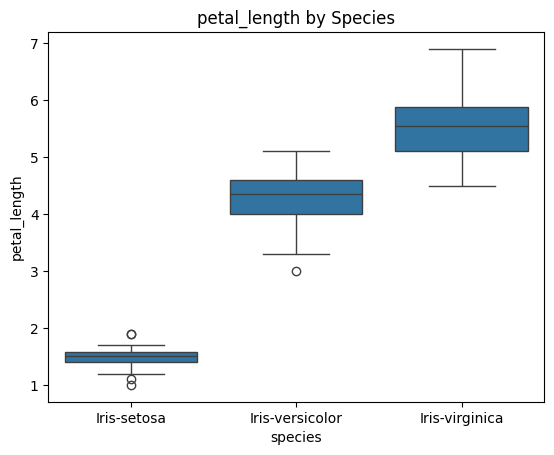

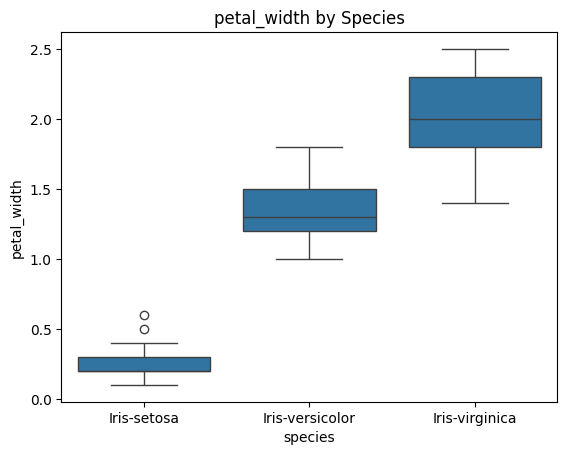

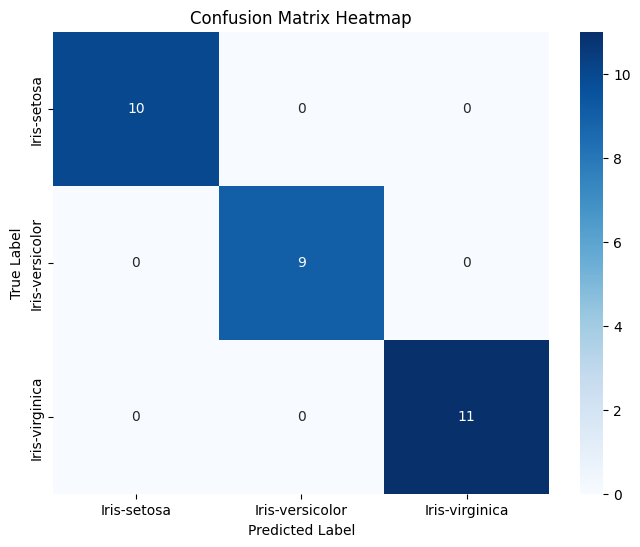

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     sepal_length  sepal_width  petal_length  petal_width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataframe
print(df.head())

# Basic information about the dataset
print(df.info())

# Check for any missing values
print(df.isnull().sum())

# Statistical summary of the dataset
print(df.describe())

# Distribution of the target variable
sns.countplot(df['species'])
plt.title("Species Distribution")
plt.show()

# Pairplot to visualize the relationship between features and the target variable
sns.pairplot(df, hue='species')
plt.show()

# Boxplot to visualize the distribution of features and detect outliers
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure()
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f"{feature} by Species")
    plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# The EDA visualizations will help in understanding the dataset better

# Prepare the features and target
# Assuming 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' are the features in the dataset
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Selects multiple columns
y = df['species']

# Encode the target variable (species) to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(X_train)
print(y_train)

# Predict the test set results
y_pred = knn.predict(X_test)
print(y_pred)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


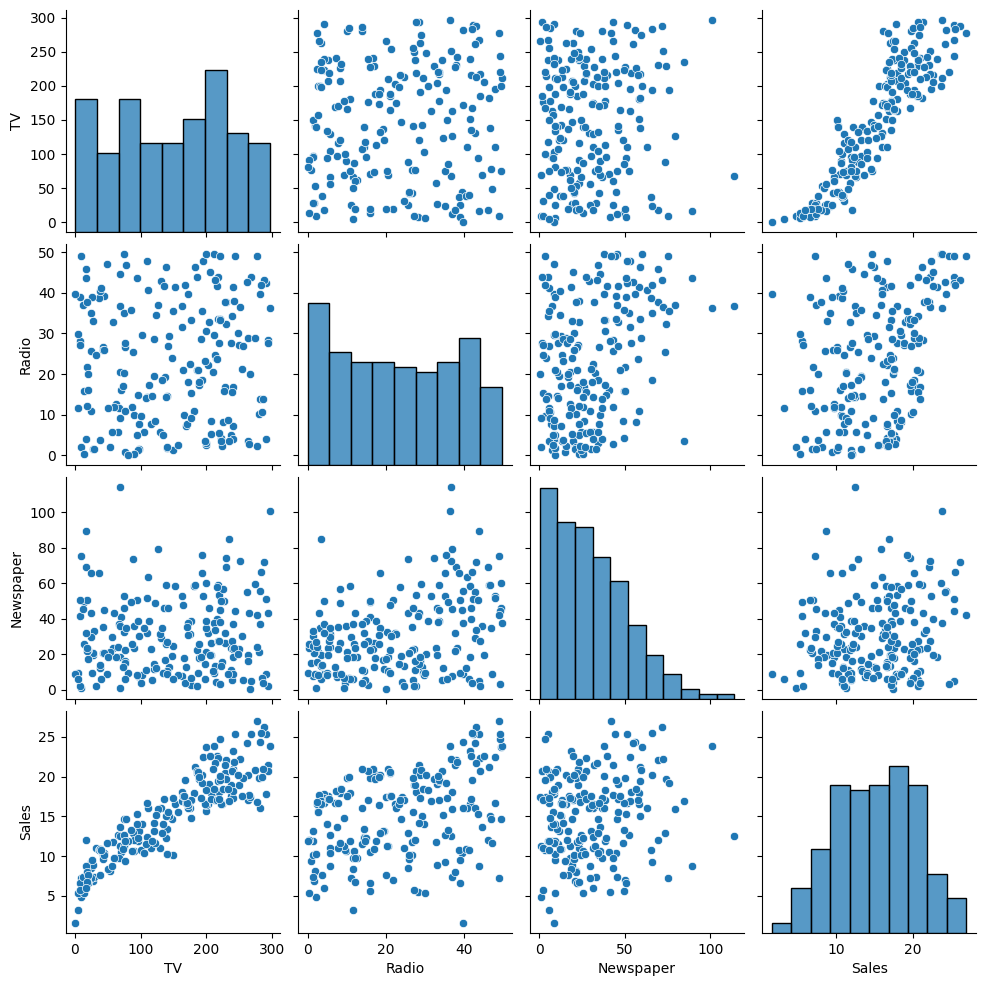

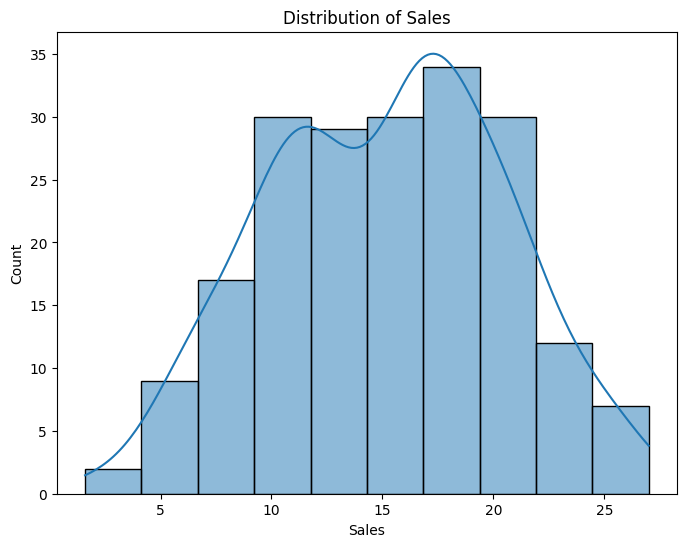

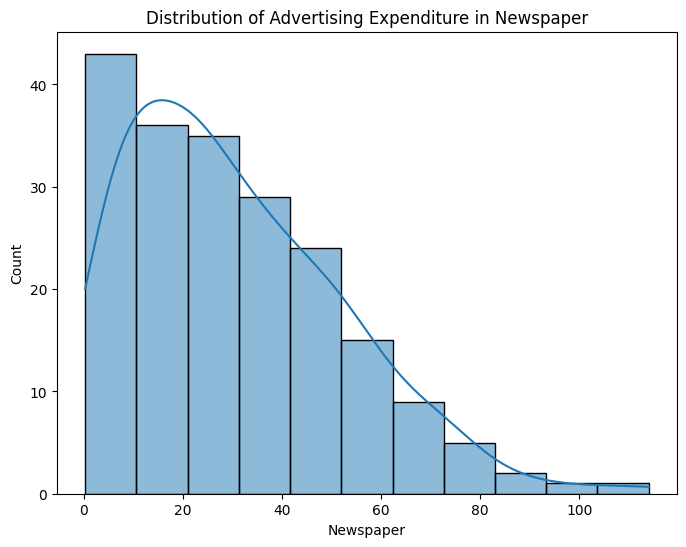

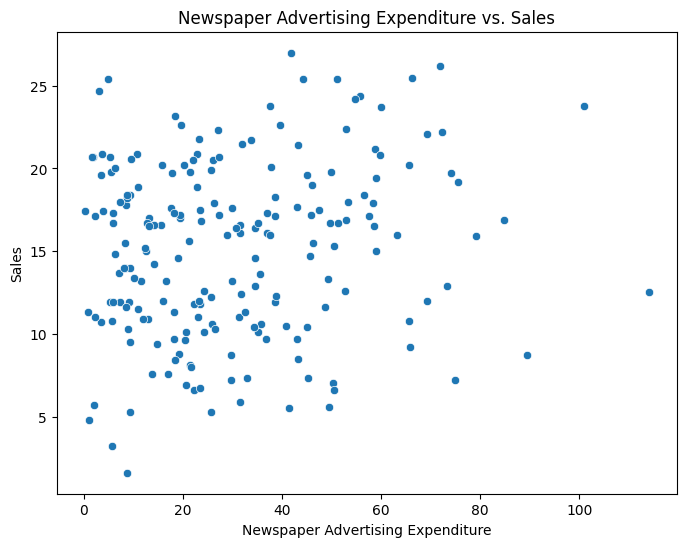

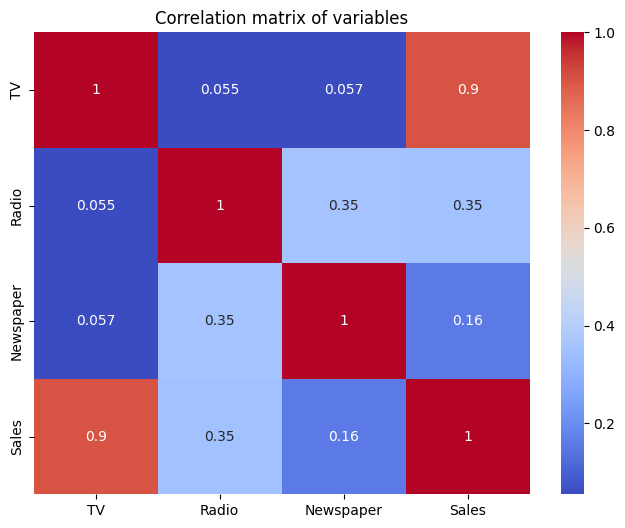

     Newspaper
0         69.2
1         45.1
2         69.3
3         58.5
4         58.4
..         ...
195       13.8
196        8.1
197        6.4
198       66.2
199        8.7

[200 rows x 1 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64
[16.18393979 16.18393979 15.82334825 15.89769702 14.33637283 16.17650491
 15.22855808 14.90142349 14.70439924 15.38840794 14.29919844 15.32149404
 17.36980268 14.56685402 15.20625345 15.52595316 15.75643435 14.74529107
 15.42558232 14.62633303 16.9757542  18.45529474 14.65978998 16.90512286
 14.25087174 15.01294664 15.47390902 14.59659352 15.18023138 14.295481
 15.00551176 14.89770605 16.44787792 17.54080486 15.59286706 14.41443903
 14.53339707 16.43672561 14.41815647 14.98692457]
Mean Squared Error: 30.759376922769615
R2 Score: 0.004586344085821592


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Split dataset into features (X) and target label (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Normalize the feature dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf_clf = rf_clf.predict(X_test)

# Logistic Regression Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(y_test, y_pred_log_reg))

# Random Forest Evaluation
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf_clf))

# Confusion Matrix
print("Confusion Matrix for Random Forest")
print(confusion_matrix(y_test, y_pred_rf_clf))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

KeyError: "['is_fraud'] not found in axis"

In [ ]:
!pip install tensorflow
!pip install Pillow
from PIL import Image

# Load an image
image_path = '/content/2.png'
img = Image.open(image_path)

# Resize the image
new_img = img.resize((250, 250))

# Rotate the image
rotated_img = new_img.rotate(90)

# Convert the image to RGB mode
rotated_img = rotated_img.convert('RGB')

# Save the modified image
rotated_img.save('/content/modified_image.jpg')

print("Image resized to 250x250 and rotated 90 degrees.")

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the pre-trained MobileNetV2 model.
model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Load an image file, resizing it to 224x224 pixels (required input size for MobileNetV2).
img_path = '/content/2.png'
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array and preprocess it.
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Classify the image.
predictions = model.predict(x)

# Decode and print the top-3 predicted classes.
print('Predictions:', decode_predictions(predictions, top=3)[0])

Image resized to 250x250 and rotated 90 degrees.
35363/35363 [==============================] - 0s 0us/step
Predictions: [('n03595614', 'jersey', 0.07422641), ('n06596364', 'comic_book', 0.071067154), ('n04370456', 'sweatshirt', 0.04314488)]


In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Image transformation. You typically don't need additional normalization for the Faster R-CNN model as used here.
transform = T.Compose([T.ToTensor()])

# Mock-up for demonstration. Please replace with actual COCO labels for comprehensive use.
CocoNames = {
    1: "person", 2: "bicycle", 3: "car",  # Continuing with actual indices might be required
    # Add more as per the actual COCO dataset labels.
}

def detect_objects(image_path):
    img = Image.open(image_path).convert("RGB")  # Ensure image is RGB
    img = transform(img)

    with torch.no_grad():
        prediction = model([img])

    # prediction is a list of dictionaries
    for element in range(len(prediction[0]['boxes'])):
        boxes = prediction[0]['boxes'][element].numpy()
        label_idx = prediction[0]['labels'][element].item()
        label = CocoNames.get(label_idx, f"Label {label_idx}")  # Get label name from CocoNames, or use the Label index
        score = prediction[0]['scores'][element].item()

        if score > 0.5:  # Confidence threshold
            print(f"Object: {label}, Confidence: {score:.4f}, Box: {boxes}")

# Provide the path to an image
image_path = '/content/2.png'
detect_objects(image_path)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Object: person, Confidence: 0.9987, Box: [ 205.97806    82.961754  858.3506   1008.2392  ]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import mobilenet_v2

# Load the pre-trained MobileNetV2 model
model = mobilenet_v2.MobileNetV2(weights='imagenet')

def classify_image(image_path):
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = mobilenet_v2.preprocess_input(x)

    # Make a prediction
    preds = model.predict(x)

    # Decode the prediction
    print('Predictions:', mobilenet_v2.decode_predictions(preds, top=3)[0])

# Provide the path to an image
image_path = '/content/ronaldo.jpg'
classify_image(image_path)

1/1 [==============================] - 1s 853ms/step
Predictions: [('n04039381', 'racket', 0.06657925), ('n02799071', 'baseball', 0.06360639), ('n02802426', 'basketball', 0.06014834)]


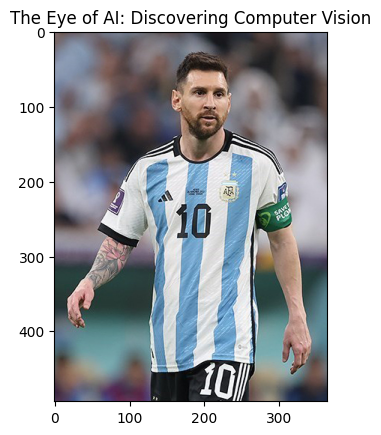

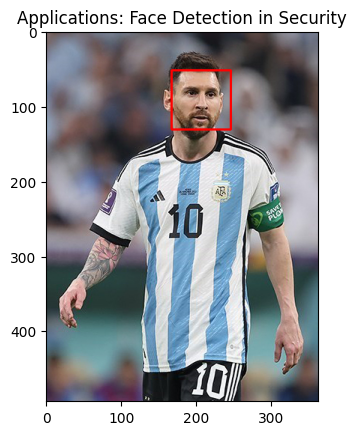

1/1 [==============================] - 2s 2s/step
Predicted Object: baseball


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Load an image using OpenCV
image = cv2.imread('/content/messi.jpg')

# Convert image color from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.title('The Eye of AI: Discovering Computer Vision')
plt.show()

# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces within the image
faces = face_cascade.detectMultiScale(image_rgb, 1.1, 4)

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the image with detected faces
plt.imshow(image_rgb)
plt.title('Applications: Face Detection in Security')
plt.show()

import tensorflow as tf

# Load a pretrained model (MobileNetV2) from TensorFlow
model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# Prepare an image to fit the model requirements
img = tf.image.resize(image_rgb, (224, 224))
img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
img = img[None, ...] # Add a batch dimension

# Predict the class of the image
predictions = model.predict(img)

# Decode the predictions
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0]
predicted_class = decoded_predictions[0][1]

print(f'Predicted Object: {predicted_class}')

In [ ]:
!pip install opencv-python-headless numpy tensorflow
import cv2
import numpy as np

# Make sure the paths to your model files are correct
yolo_config_path = '/content/yolov3.cfg'
yolo_weights_path = '/content/yolov3.weights'

# Load the pre-trained YOLO model from the disk
net = cv2.dnn.readNetFromDarknet(yolo_config_path, yolo_weights_path)

# Load the image to detect
image_path = '/content/Virat Kohli.png'
image = cv2.imread(image_path)
height, width = image.shape[:2]

# Prepare the image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Feed the image to the network
net.setInput(blob)
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
outputs = net.forward(output_layers)

# Draw the bounding boxes
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = (detection[:4] * np.array([width, height, width, height])).astype('int')
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# If using Jupyter Notebook, consider matplotlib to display the image
# For desktop environments:
# cv2.imshow('Detected Objects', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Alternative display for Jupyter Notebooks
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained Inception model
model = InceptionV3(weights='imagenet')

# Load and prepare image
image_path = '/content/messi.jpg'
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict the class
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print top 3 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

error: OpenCV(4.8.0) /io/opencv/modules/dnn/src/darknet/darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: /content/yolov3.cfg in function 'readNetFromDarknet'


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1] by dividing by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the dataset to have a single color channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

model = Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # First layer that flattens the image data
    layers.Dense(128, activation='relu'),     # A hidden layer with 128 nodes
    layers.Dropout(0.2),                      # A dropout layer to reduce overfitting
    layers.Dense(10, activation='softmax')    # Output layer with 10 nodes (0-9 digits) and softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)
print(predictions)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2974 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1440 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9765
313/313 - 1s - loss: 0.0695 - accuracy: 0.9785 - 558ms/epoch - 2ms/step

Test accuracy: 0.9785000085830688
313/313 [==============================] - 1s 2ms/step
[[1.74318671e-07 6.17563778e-09 9.89744058e-06 ... 9.99796867e-01
  5.89618594e-07 5.03166075e-06]
 [5.26648325e-09 2.70585360e-06 9.99996126e-01 ... 1.14183646e-13
  1.46221311e-08 1.04630168e-14]
 [1.13209694e-06 9.98870254e-01 1.93744650e-04 ... 5.99624240e-04
  2.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00


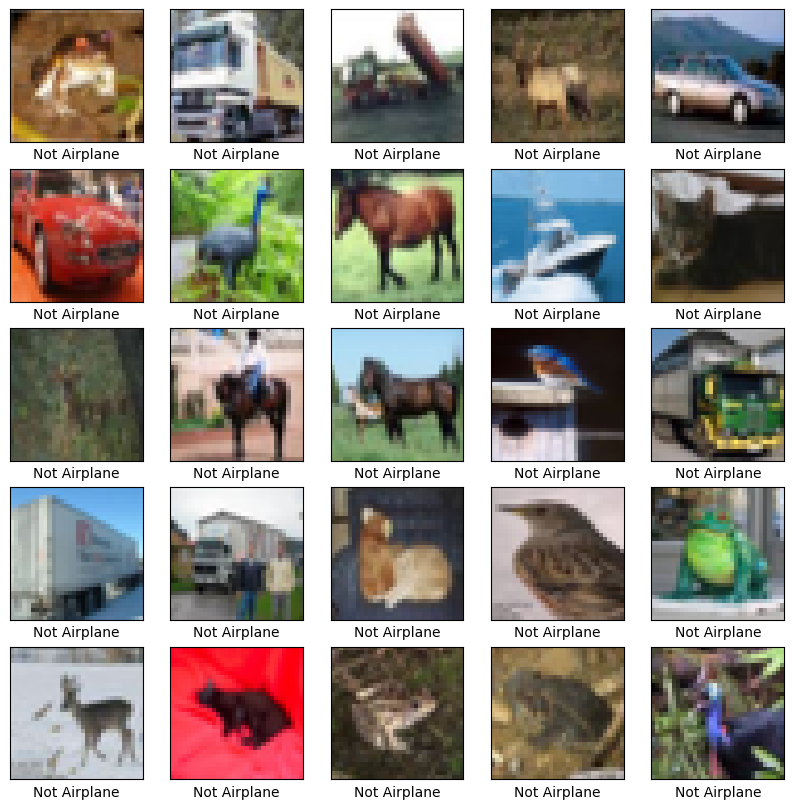

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.2249 - accuracy: 0.9149 - val_loss: 0.1871 - val_accuracy: 0.9289
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.1828 - accuracy: 0.9305 - val_loss: 0.1742 - val_accuracy: 0.9344
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.1662 - accuracy: 0.9369 - val_loss: 0.1712 - val_accuracy: 0.9337
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.1485 - accuracy: 0.9442 - val_loss: 0.1541 - val_accuracy: 0.9403
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.1361 - accuracy: 0.9484 - val_loss: 0.1461 - val_accuracy: 0.9449
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.1212 - accuracy: 0.9544 - val_loss: 0.1423 - val_accuracy: 0.9474
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.1084 - accuracy: 0.9590 - val_loss: 0.1472 -

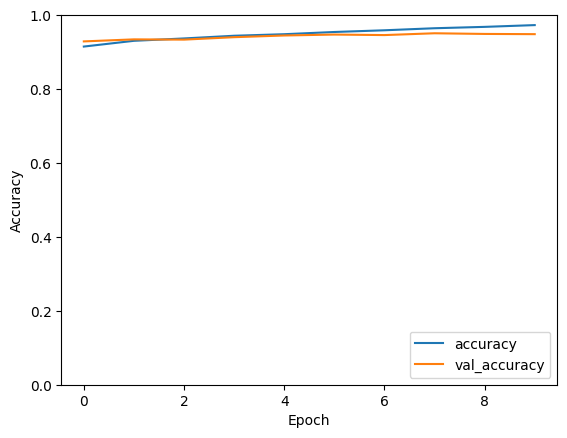

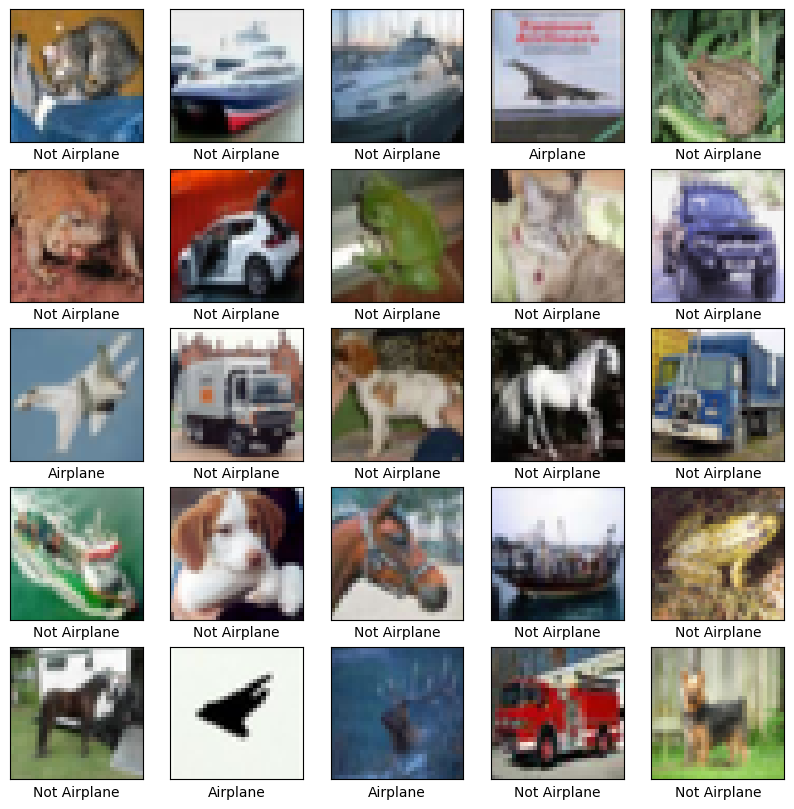

In [ ]:
!pip install notebook
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# For a simpler example, convert labels to 'airplane' and 'not airplane'
train_labels = (train_labels.squeeze() == 0).astype(int)
test_labels = (test_labels.squeeze() == 0).astype(int)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel('Airplane' if train_labels[i] else 'Not Airplane')
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

predictions = model.predict(test_images)

# Display some predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel('Airplane' if predictions[i] > 0.5 else 'Not Airplane')
plt.show()

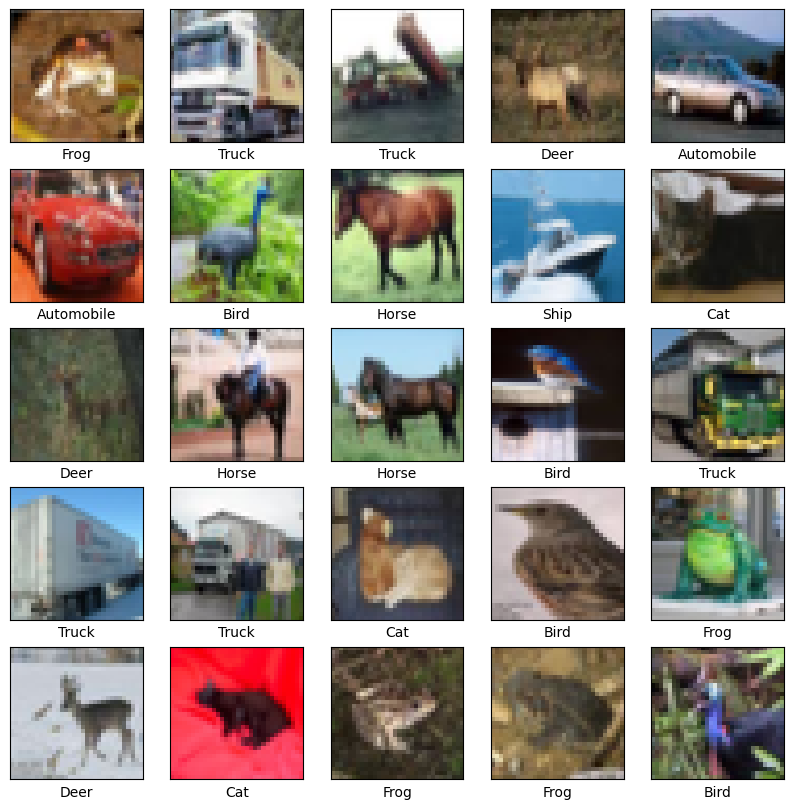

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5174 - accuracy: 0.4479 - val_loss: 1.2580 - val_accuracy: 0.5470
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1542 - accuracy: 0.5916 - val_loss: 1.0930 - val_accuracy: 0.6192
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9942 - accuracy: 0.6487 - val_loss: 1.0102 - val_accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9020 - accuracy: 0.6827 - val_loss: 0.9137 - val_accuracy: 0.6785
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8361 - accuracy: 0.7094 - val_loss: 0.9016 - val_accuracy: 0.6843
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7774 - accuracy: 0.7285 - val_loss: 0.8916 - val_accuracy: 0.6946
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7317 - accuracy: 0.7436 - val_loss: 0.8652 -

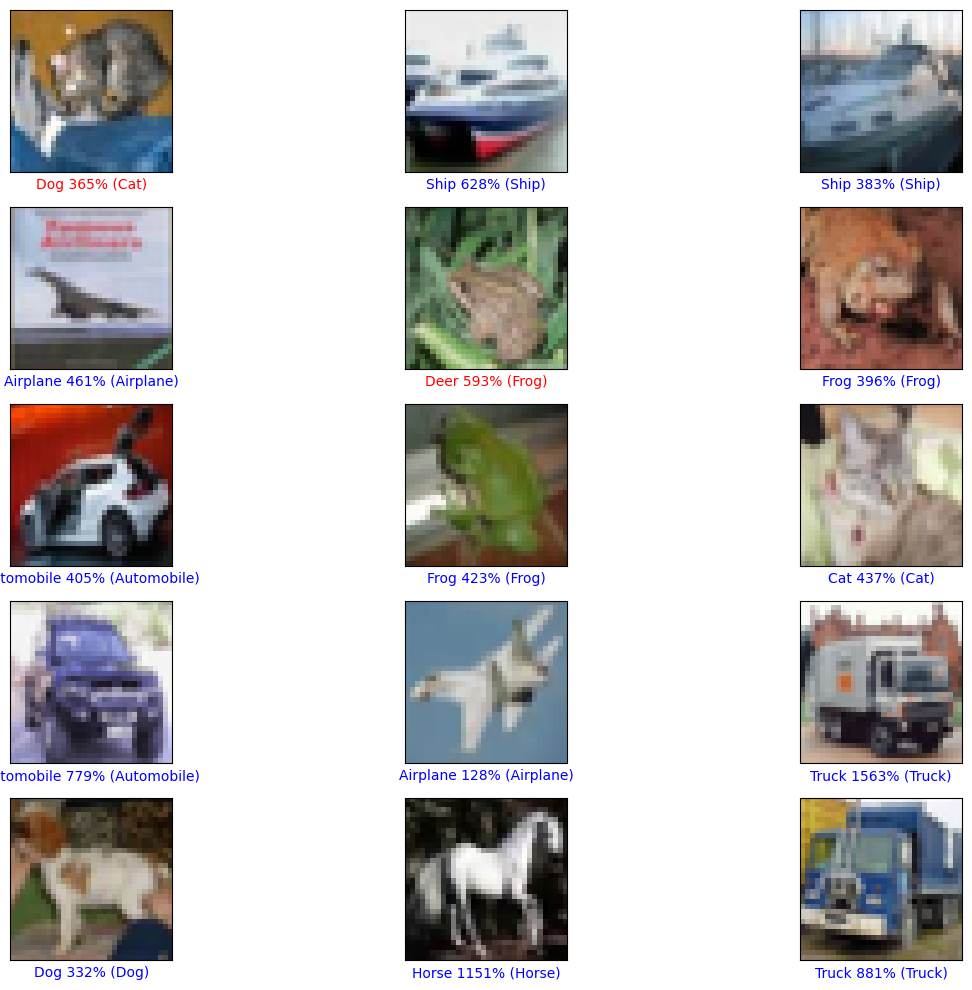

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to a pixel value range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions
predictions = model.predict(test_images)

# Function to plot image, truth label, and model prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]  # Correctly indexing true_label for its value
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

# Plot the first X test images, their predicted labels, and the true labels.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()